In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
def process_domain_with_copyright_col(x):
    if isinstance(x, str):
        x = x.lower()
        if x == "zero" or x == "0":
            return 0
        if x == "one" or x == "1":
            return 1
    else:
        return x

In [128]:
# Load the data and drop the url and status columns
df = pd.read_csv('./dataset_link_phishing.csv', low_memory=False)

data = df.iloc[:, 2:-1]
y = df.iloc[:, -1]

In [129]:
label_encoder = LabelEncoder()
data['domain_with_copyright'] = data['domain_with_copyright'].apply(process_domain_with_copyright_col)
print(data['domain_with_copyright'])

0        1
1        0
2        0
3        1
4        0
        ..
19426    0
19427    0
19428    0
19429    0
19430    1
Name: domain_with_copyright, Length: 19431, dtype: int64


In [130]:
# Splitting the dataset into training (80%), validation (10%), and test sets (10%)
x_train, x_temp, y_train, y_temp = train_test_split(data, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [131]:
# Note: without the scaler, the model could not be trained
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))

# Train the mocel
pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [132]:
# Validate the model
val_predictions = pipeline.predict(x_val)

val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.9485331960885229


In [133]:
# Test the model
test_predictions = pipeline.predict(x_test)

test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9387860082304527


In [134]:
conf_matrix = confusion_matrix(y_test, test_predictions)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[905  51]
 [ 68 920]]


In [135]:
def precision_score(conf_matrix):
    TP = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    return TP / (TP + FP) if (TP + FP) > 0 else 0

In [136]:
def recall_score(conf_matrix):
    TP = conf_matrix[0][0]
    FN = conf_matrix[1][0]
    return TP / (TP + FN) if (TP + FN) > 0 else 0

In [137]:
precision = precision_score(conf_matrix)
recall = recall_score(conf_matrix)
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Precision Score: 0.946652719665272
Recall Score: 0.9301130524152107
F1 Score: 0.9383100051840332


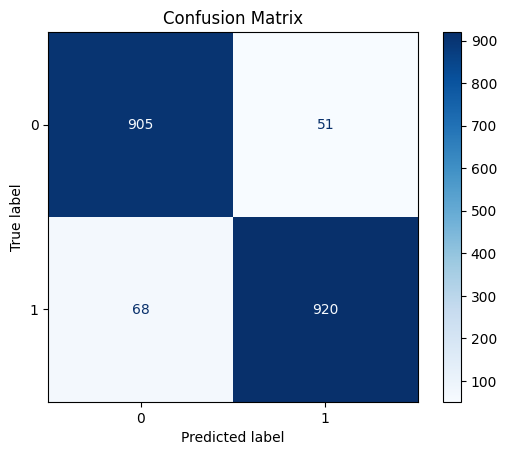

In [146]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix")
plt.show()

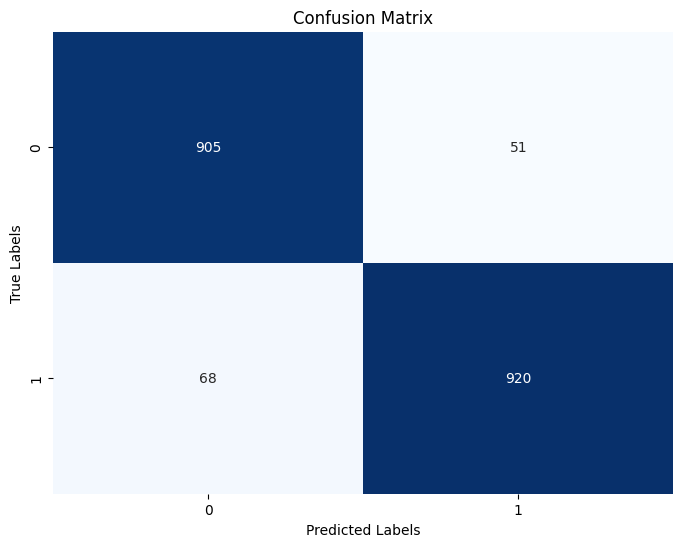

In [139]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [140]:
# Define a list of solvers to compare
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg']

# Create a dictionary to store cross-validation scores for each solver
solver_scores = {}

# Iterate over each solver
for solver in solvers:
    # Create a pipeline with StandardScaler and logistic regression with the current solver
    pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000, solver=solver))
    
    # Perform cross-validation and store the scores
    scores = cross_val_score(pipeline, x_train, y_train, cv=5)
    solver_scores[solver] = scores

# Print the cross-validation scores for each solver
for solver, scores in solver_scores.items():
    print(f"Solver: {solver}, Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

Solver: lbfgs, Mean Accuracy: 0.9481, Std Dev: 0.0015
Solver: saga, Mean Accuracy: 0.9482, Std Dev: 0.0016
Solver: liblinear, Mean Accuracy: 0.9483, Std Dev: 0.0015
Solver: newton-cg, Mean Accuracy: 0.9483, Std Dev: 0.0015
